In [ ]:
! pip install pykrx 

from pykrx import stock

import ipywidgets as widgets 
from ipywidgets import interact, interact_manual 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

data = stock.get_market_ohlcv_by_date(fromdate="20150104", todate="20211202", ticker="066570")

     |████████████████████████████████| 87 kB 3.0 MB/s 
     |████████████████████████████████| 60 kB 4.0 MB/s 
     |████████████████████████████████| 251 kB 45.5 MB/s 


#  Predict the one-step ahead closing price using the LSTM model.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

# train Parameters
seq_length = 7
data_dim = 5
output_dim = 1
learning_rate = 0.01
iterations = 500

# Open, High, Low, Volume, Close
xy = data.to_numpy()
xy = xy[::-1]  # reverse order (chronically ordered)

# train/test split
train_size = int(len(xy) * 0.7)  # 1887 = int(len(xy) * 0.7) = int(2697*0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]  # Index from [train_size - seq_length] to utilize past sequence

# Scale each
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

# build datasets
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        x = time_series[i:i + seq_length, :]
        y = time_series[i + seq_length, [-2]]  # Next close price
        print(x, "->", y)
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

print(trainX.shape)  # (1180, 7, 5)
print(trainY.shape)  # (1180, 1)

tf.model = tf.keras.Sequential();
tf.model.add(tf.keras.layers.LSTM(units=1, input_shape=(seq_length, data_dim)))  #units: dimensionality of the output space.
tf.model.add(tf.keras.layers.Dense(units=output_dim, activation='tanh'))
tf.model.summary()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [0.36366868 0.34332334 0.37159676 0.35172896 0.02107444]] -> [0.36011177]
[[0.36437967 0.34332334 0.3745401  0.36709745 0.0159095 ]
 [0.34305012 0.33999334 0.3598234  0.36081034 0.02920396]
 [0.34802702 0.32733933 0.35246505 0.33636046 0.03183272]
 [0.35655883 0.33266733 0.36055923 0.34614041 0.0217727 ]
 [0.35655883 0.33599734 0.36497425 0.34893468 0.01852728]
 [0.36366868 0.34332334 0.37159676 0.35172896 0.02107444]
 [0.36437967 0.34332334 0.37821928 0.36011177 0.00914696]] -> [0.36500175]
[[0.34305012 0.33999334 0.3598234  0.36081034 0.02920396]
 [0.34802702 0.32733933 0.35246505 0.33636046 0.03183272]
 [0.35655883 0.33266733 0.36055923 0.34614041 0.0217727 ]
 [0.35655883 0.33599734 0.36497425 0.34893468 0.01852728]
 [0.36366868 0.34332334 0.37159676 0.35172896 0.02107444]
 [0.36437967 0.34332334 0.37821928 0.36011177 0.00914696]
 [0.3814433  0.35864136 0.38631347 0.36500175 0.02482961]] -> [0.37757597]
[[0.34802702 0.32733933 0.35246505 0.336360

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
37/37 [==============================] - 2s 3ms/step - loss: 0.0601
Epoch 2/500
37/37 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 3/500
37/37 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 4/500
37/37 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 5/500
37/37 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 6/500
37/37 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 7/500
37/37 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 8/500
37/37 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 9/500
37/37 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 10/500
37/37 [==============================] - 0s 3ms/step - loss: 9.9016e-04
Epoch 11/500
37/37 [==============================] - 0s 4ms/step - loss: 9.4280e-04
Epoch 12/500
37/37 [==============================] - 0s 4ms/step - loss: 8.9094e-04
Epoch 13/500
37/37 [=====

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


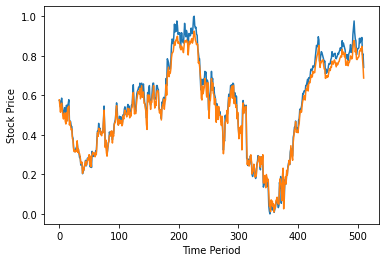

In [ ]:
tf.model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr=learning_rate))
tf.model.fit(trainX, trainY, epochs=iterations)

# Test step
test_predict = tf.model.predict(testX)

# Plot predictions
plt.plot(testY)
plt.plot(test_predict)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()

In [ ]:
#mape
from sklearn.metrics import mean_absolute_percentage_error
mape_test=mean_absolute_percentage_error(test_predict,testY)
print(mape_test)

0.06929694163980955


# Predict the future 5 days (Open Price, High Price, Low Price, Volume, Closing Price) using standard Seq2Seq Model and Seq2Seq Model with Attention Technique.

##predict using standard Seq2Seq Model

In [ ]:
import pickle as pkl  # 텍스트 이외의 자료형을 파일로 저장하기 위하여 모듈 pickle을 사용함
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Input, BatchNormalization, multiply, concatenate, Flatten, Activation, dot
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping  # Keras의 Early stopping을 구현함

In [ ]:
#날짜 model에 적용안하니 index 제거한다.
data=data.reset_index(drop=True)
data


,시가,고가,저가,종가,거래량
0,58500,58900,57500,58400,379003
1,58100,60500,57700,60100,799629
2,59500,60600,59300,60000,703542
3,60300,63000,60300,62200,1404924
4,62600,63500,61600,61700,790827
...,...,...,...,...,...
1697,125500,126500,121500,122000,872482
1698,118000,122000,118000,119500,933062
1699,120500,122000,115000,115500,1809765
1700,116500,120000,115500,120000,851165


In [ ]:
#trainset 나누기
train_ratio = 0.7
train_len= int(train_ratio*len(data))
print(train_len)

1191


In [ ]:
#열 7개로 만든다. 입력변수두개와 인덱스, train은 라벨 1, test는 라벨 0 지정
x_lbl=np.column_stack([data,data.index,[1]*train_len+[0]*(len(data.index)-train_len)])
print(x_lbl)

[[  58500   58900   57500 ...  379003       0       1]
 [  58100   60500   57700 ...  799629       1       1]
 [  59500   60600   59300 ...  703542       2       1]
 ...
 [ 120500  122000  115000 ... 1809765    1699       0]
 [ 116500  120000  115500 ...  851165    1700       0]
 [ 118000  122000  118000 ...  725845    1701       0]]


In [ ]:
#scaling 위해 train data max값 구한다.
x_train_max = x_lbl[x_lbl[:, 6]==1, :5].max(axis=0)  # only normalize for the first 5 columns
#리스트로 바꿔서 2차원으로 바꾼다. 끝에 두개는 스케일링안해
x_train_max = x_train_max.tolist()+[1]*2  # [1]*2 -> [1,1]  
print(x_train_max)
#최댓값으로 나눠 스케일링 해준다.
x_normalize = np.divide(x_lbl, x_train_max)

[113500, 114500, 111000, 113500, 6683944, 1, 1]


In [ ]:
#truncate로 인풋시퀀스만들고 output에 대한 조각만든다. 그뒤 train과 test데이터로 나누었다. 3D array로 만든다.

def truncate(x, feature_cols=range(6), target_cols=range(2), label_col=3, train_len=10, test_len=2):
    in_, out_, lbl = [], [], []
    for i in range(len(x)-train_len-test_len+1):
        in_.append(x[i:(i+train_len), feature_cols].tolist())
        out_.append(x[(i+train_len):(i+train_len+test_len), target_cols].tolist())
        lbl.append(x[i+train_len, label_col])
    return np.array(in_), np.array(out_), np.array(lbl)
    

#과거 10개 받아서(train_len=10) 미래(기간) 5개(test_len=5) 예측한다는 의미다.
X_in, X_out, lbl = truncate(x_normalize, feature_cols=range(6), target_cols=range(6), 
                            label_col=6, train_len=10, test_len=5)
print(X_in.shape, X_out.shape, lbl.shape)

X_input_train = X_in[np.where(lbl==1)]
X_output_train = X_out[np.where(lbl==1)]
X_input_test = X_in[np.where(lbl==0)]
X_output_test = X_out[np.where(lbl==0)]
print(X_input_train.shape, X_output_train.shape)
print(X_input_test.shape, X_output_test.shape)

(1688, 10, 6) (1688, 5, 6) (1688,)
(1181, 10, 6) (1181, 5, 6)
(507, 10, 6) (507, 5, 6)


In [ ]:
# RNN의 자료구조는 (sample), timesteps, features)이며 입력구조는 2D텐서 (timesteps, features)
n_hidden = 100
input_train = Input(shape=(X_input_train.shape[1], X_input_train.shape[2]-1))
output_train = Input(shape=(X_output_train.shape[1], X_output_train.shape[2]-1))
print(input_train)
print(output_train)


KerasTensor(type_spec=TensorSpec(shape=(None, 10, 5), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5), dtype=tf.float32, name='input_6'), name='input_6', description="created by layer 'input_6'")


In [ ]:
encoder_last_h1, encoder_last_h2, encoder_last_c = LSTM(
  n_hidden, activation='elu', dropout=0.2, recurrent_dropout=0.2, 
  return_sequences=False, return_state=True)(input_train)
# The output of LSTM is a 3D tensor of shape (batch_size, timesteps, units)
# return_sequences: 출력 시퀀스의 반환 여부
# return_state: state vector의 반환 여부
#last_h1, last_h2와 같아서 하나만 만들었다.
print(encoder_last_h1)
print(encoder_last_h2)
print(encoder_last_c)
# Add batch normalisation to avoid gradient explosion
encoder_last_h2 = BatchNormalization(momentum=0.6)(encoder_last_h2)
encoder_last_c = BatchNormalization(momentum=0.6)(encoder_last_c)

#The decoder LSTM: we make 20% copies of the last hidden state of encoder & 
# use them as input to the decoder
decoder = RepeatVector(output_train.shape[1])(encoder_last_h2)
decoder = LSTM(n_hidden, activation='elu', dropout=0.2, recurrent_dropout=0.2, return_state=False, return_sequences=True)(
    decoder, initial_state=[encoder_last_h2, encoder_last_c])
print(decoder)
out = TimeDistributed(Dense(output_train.shape[2]))(decoder)
print(out)

KerasTensor(type_spec=TensorSpec(shape=(None, 100), dtype=tf.float32, name=None), name='lstm_5/strided_slice_3:0', description="created by layer 'lstm_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 100), dtype=tf.float32, name=None), name='lstm_5/while:4', description="created by layer 'lstm_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 100), dtype=tf.float32, name=None), name='lstm_5/while:5', description="created by layer 'lstm_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 5, 100), dtype=tf.float32, name=None), name='lstm_6/transpose_1:0', description="created by layer 'lstm_6'")
KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5), dtype=tf.float32, name=None), name='time_distributed_2/Reshape_1:0', description="created by layer 'time_distributed_2'")


In [ ]:
model = Model(inputs=input_train, outputs=out)
opt = Adam(lr=0.01, clipnorm=1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 10, 5)]      0           []                               
                                                                                                  
 lstm_5 (LSTM)                  [(None, 100),        42400       ['input_5[0][0]']                
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 100)         400         ['lstm_5[0][1]']                 
 rmalization)                                                                               

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Train the model
epoch = 100
es = EarlyStopping(monitor='val_loss', mode='min', patience=50)
history = model.fit(X_input_train[:, :, :5], X_output_train[:, :, :5], validation_split=0.2, 
                    epochs=epoch, verbose=1, callbacks=[es], 
                    batch_size=100)
train_mae = history.history['mae']
valid_mae = history.history['val_mae']
 
model.save('model_forecasting_seq2seq.h5')

Epoch 1/100
10/10 [==============================] - 7s 111ms/step - loss: 0.4568 - mae: 0.3976 - val_loss: 0.1327 - val_mae: 0.3257
Epoch 2/100
10/10 [==============================] - 1s 53ms/step - loss: 0.0330 - mae: 0.1375 - val_loss: 0.0258 - val_mae: 0.1430
Epoch 3/100
10/10 [==============================] - 1s 51ms/step - loss: 0.0126 - mae: 0.0839 - val_loss: 0.0114 - val_mae: 0.0927
Epoch 4/100
10/10 [==============================] - 1s 53ms/step - loss: 0.0075 - mae: 0.0652 - val_loss: 0.0036 - val_mae: 0.0484
Epoch 5/100
10/10 [==============================] - 0s 50ms/step - loss: 0.0057 - mae: 0.0566 - val_loss: 0.0024 - val_mae: 0.0399
Epoch 6/100
10/10 [==============================] - 1s 55ms/step - loss: 0.0047 - mae: 0.0501 - val_loss: 0.0032 - val_mae: 0.0495
Epoch 7/100
10/10 [==============================] - 1s 52ms/step - loss: 0.0044 - mae: 0.0488 - val_loss: 0.0016 - val_mae: 0.0334
Epoch 8/100
10/10 [==============================] - 1s 54ms/step - loss: 0

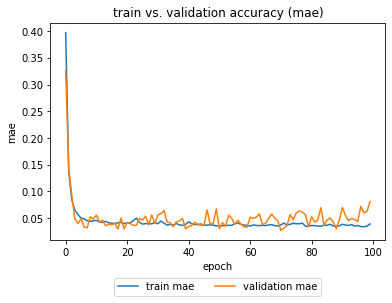

In [ ]:
#그림으로 확인
plt.plot(train_mae, label='train mae'), 
plt.plot(valid_mae, label='validation mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.title('train vs. validation accuracy (mae)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
plt.show()

In [ ]:
#---- Prediction:
train_pred_detrend = model.predict(X_input_train[:, :,:5])*x_train_max[:5]
test_pred_detrend = model.predict(X_input_test[:, :, :5])*x_train_max[:5]
print(train_pred_detrend.shape, test_pred_detrend.shape)

(1181, 5, 5) (507, 5, 5)


In [ ]:
#---- Actual
train_true_detrend = X_output_train[:, :,:5]*x_train_max[:5]
test_true_detrend = X_output_test[:, :, :5]*x_train_max[:5]
print(train_true_detrend.shape, test_true_detrend.shape)

(1181, 5, 5) (507, 5, 5)


In [ ]:
#비교위해 형태 변환
pred_train=train_pred_detrend.reshape(-1,)
true_train=train_true_detrend.reshape(-1,)

pred_test=test_pred_detrend.reshape(-1,)
true_test=test_true_detrend.reshape(-1,)

In [ ]:
#mape
from sklearn.metrics import mean_absolute_percentage_error
mape_train=mean_absolute_percentage_error(pred_train,true_train)
mape_test=mean_absolute_percentage_error(pred_test,true_test)
print(mape_train, mape_test)

0.19132810326733632 0.40265881317454366


#predict using standard Seq2Seq Model with Attention Technique.



In [ ]:
# RNN의 자료구조는 (sample), timesteps, features)이며 입력구조는 2D텐서 (timesteps, features)
n_hidden = 100
input_train = Input(shape=(X_input_train.shape[1], X_input_train.shape[2]-1))
output_train = Input(shape=(X_output_train.shape[1], X_output_train.shape[2]-1))

#---- The encoder LSTM: 
encoder_stack_h, encoder_last_h, encoder_last_c = LSTM(
    n_hidden, activation='elu', dropout=0.2, recurrent_dropout=0.2, 
    return_state=True, return_sequences=True)(input_train)
#return_sequences=True + return_state=True =>  All Hidden States + Last Hidden State + Last Cell State 

In [ ]:
#---- The decoder LSTM: 
# We make 20 copies of the last hidden state of encoder & use them as input to the decoder
decoder_input = RepeatVector(output_train.shape[1])(encoder_last_h)
decoder_stack_h = LSTM(n_hidden, activation='elu', dropout=0.2, recurrent_dropout=0.2,
  return_state=False, return_sequences=True)(
  decoder_input, initial_state=[encoder_last_h, encoder_last_c])

#---- Attention Layer: 
# Calculate the alignment score, and apply softmax activation function
attention_score = dot([decoder_stack_h, encoder_stack_h], axes=[2, 2])
attention = Activation('softmax')(attention_score)
# Calculate the context vector, and apply batch normalisation
context = dot([attention, encoder_stack_h], axes=[2,1])
context = BatchNormalization(momentum=0.6)(context)
# Concatenate the context vector and stacked hidden states of decoder, 
# and use it as input to the last dense layer
decoder_combined_context = concatenate([context, decoder_stack_h])
out = TimeDistributed(Dense(output_train.shape[2]))(decoder_combined_context)

In [ ]:
# Build the model and compile it
model = Model(inputs=input_train, outputs=out)
opt = Adam(lr=0.01, clipnorm=1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 10, 5)]      0           []                               
                                                                                                  
 lstm_7 (LSTM)                  [(None, 10, 100),    42400       ['input_7[0][0]']                
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 repeat_vector_3 (RepeatVector)  (None, 5, 100)      0           ['lstm_7[0][1]']                 
                                                                                            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
10/10 [==============================] - 7s 117ms/step - loss: 0.1651 - mae: 0.2548 - val_loss: 0.0132 - val_mae: 0.0967
Epoch 2/100
10/10 [==============================] - 1s 56ms/step - loss: 0.0150 - mae: 0.0904 - val_loss: 0.0227 - val_mae: 0.1327
Epoch 3/100
10/10 [==============================] - 1s 58ms/step - loss: 0.0074 - mae: 0.0635 - val_loss: 0.0026 - val_mae: 0.0397
Epoch 4/100
10/10 [==============================] - 1s 55ms/step - loss: 0.0049 - mae: 0.0524 - val_loss: 0.0046 - val_mae: 0.0539
Epoch 5/100
10/10 [==============================] - 1s 58ms/step - loss: 0.0041 - mae: 0.0467 - val_loss: 0.0015 - val_mae: 0.0286
Epoch 6/100
10/10 [==============================] - 1s 55ms/step - loss: 0.0055 - mae: 0.0565 - val_loss: 0.0039 - val_mae: 0.0498
Epoch 7/100
10/10 [==============================] - 1s 56ms/step - loss: 0.0044 - mae: 0.0499 - val_loss: 0.0022 - val_mae: 0.0379
Epoch 8/100
10/10 [==============================] - 1s 59ms/step - loss: 0

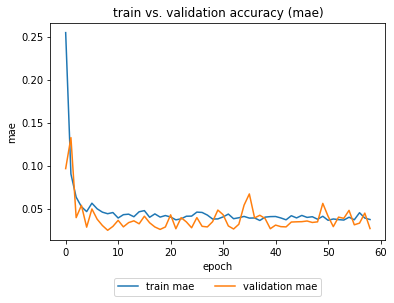

In [ ]:
# Train the model
epoch = 100
es = EarlyStopping(monitor='val_loss', mode='min', patience=50)
history = model.fit(X_input_train[:, :, :5], X_output_train[:, :, :5], validation_split=0.2, 
                    epochs=epoch, verbose=1, callbacks=[es], 
                    batch_size=100)
train_mae = history.history['mae']
valid_mae = history.history['val_mae']
 
#model.save('model_forecasting_seq2seq_Luong.h5')

plt.plot(train_mae, label='train mae'), 
plt.plot(valid_mae, label='validation mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.title('train vs. validation accuracy (mae)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
plt.show()

In [ ]:
#---- Prediction:
train_pred_detrend = model.predict(X_input_train[:, :, :5])*x_train_max[:5]
test_pred_detrend = model.predict(X_input_test[:, :, :5])*x_train_max[:5]
print(train_pred_detrend.shape, test_pred_detrend.shape)
#---- Actual
train_true_detrend = X_output_train[:, :, :5]*x_train_max[:5]
test_true_detrend = X_output_test[:, :, :5]*x_train_max[:5]
print(train_true_detrend.shape, test_true_detrend.shape)

(1181, 5, 5) (507, 5, 5)
(1181, 5, 5) (507, 5, 5)


In [ ]:
#비교위해 형태 변환
pred_train=train_pred_detrend.reshape(-1,)
true_train=train_true_detrend.reshape(-1,)

pred_test=test_pred_detrend.reshape(-1,)
true_test=test_true_detrend.reshape(-1,)

#mape
mape_train=mean_absolute_percentage_error(pred_train,true_train)
mape_test=mean_absolute_percentage_error(pred_test,true_test)
print(mape_train, mape_test)

0.10654933258072535 0.1544993272302529
